In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.99 # fator de desconto

In [20]:
def EQ_Puzzle(sigma,mu,delta,phi,beta):
    #calibrando estados de crescimento de consumo bruto
    x_1 = 1 + mu - delta
    x_2 = 1 + mu + delta
    # matriz markoviana
    pi_11 = phi
    pi_12 = 1 - phi
    pi_21 = 1 - phi
    pi_22 = phi
    Pi = np.array([[pi_11,pi_12],[pi_21, pi_22]])
    #resolvendo para preço
    pi_bar = np.linalg.matrix_power(Pi, 1000)
    pi_bar = pi_bar[1:]
    a_11 = beta*Pi[0][0]*x_1**(1-sigma);
    a_12 = beta*Pi[1][0]*x_2**(1-sigma);
    a_21 = beta*Pi[0][1]*x_1**(1-sigma);
    a_22 = beta*Pi[1][1]*x_2**(1-sigma);
    A = np.array([[a_11, a_12], [a_21, a_22]])
    b_1 = beta*Pi[0][0]*x_1**(1-sigma) + beta*Pi[0][1]*x_2**(1-sigma);
    b_2 = beta*Pi[1][0]*x_1**(1-sigma) + beta*Pi[1][1]*x_2**(1-sigma);
    B = [b_1, b_2]
    I = np.eye(2)
    inverse = np.linalg.inv(I - A)
    p = np.dot(inverse, B)
    #computando retornos 
    r_11 = ((p[0] + 1)*x_1 - p[0])/p[0]
    r_12 = ((p[1] + 1)*x_2 - p[0])/p[0]
    r_21 = ((p[0] + 1)*x_1 - p[1])/p[1]
    r_22 = ((p[1] + 1)*x_2 - p[1])/p[1]
    #esperança condicional
    r_e1 = r_11*Pi[0][0] + r_12*Pi[0][1]
    r_e2 = r_21*Pi[1][0] + r_22*Pi[1][1]
    r_e = r_e1*pi_bar[0][0] + r_e2*pi_bar[0][1]
    #taxa livre de risco
    q_1 = beta*Pi[0][0]*x_1**(-sigma) + beta*Pi[0][1]*x_2**(-sigma);
    q_2 = beta*Pi[1][0]*x_1**(-sigma) + beta*Pi[1][1]*x_2**(-sigma);
    r_f1 = 1/q_1 - 1
    r_f2 = 1/q_2 - 1
    r_f =  r_f1*pi_bar[0][0] + r_f2*pi_bar[0][1]
    Equity_premium = r_e - r_f;
    return Equity_premium

In [21]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto

EQ_Puzzle(sigma,mu,delta,phi,beta)

0.0029220581641083015

In [22]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [23]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto
# Valores de beta a serem testados
beta_values = np.linspace(0, 1, 50)
# Listas para armazenar os resultados
results_beta = []
# Loop para calcular os valores de EQ_Puzzle para cada beta
for i in beta_values:
    result = EQ_Puzzle(sigma, mu, delta, phi, i)
    results_beta.append(result)

In [53]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto
# Valores de beta a serem testados
sigma_values = np.linspace(0, 20, 80)
# Listas para armazenar os resultados
results_sigma = []
# Loop para calcular os valores de EQ_Puzzle para cada beta
for i in sigma_values:
    result = EQ_Puzzle(i, mu, delta, phi, beta)
    results_sigma.append(result)

In [54]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto
# Valores de beta a serem testados
mu_values = np.linspace(0, 0.1, 50)
# Listas para armazenar os resultados
results_mu = []
# Loop para calcular os valores de EQ_Puzzle para cada beta
for i in mu_values:
    result = EQ_Puzzle(sigma, i, delta, phi, beta)
    results_mu.append(result)

In [55]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto
# Valores de beta a serem testados
delta_values = np.linspace(0, 0.1, 50)
# Listas para armazenar os resultados
results_delta = []
# Loop para calcular os valores de EQ_Puzzle para cada beta
for i in delta_values:
    result = EQ_Puzzle(sigma, mu, i, phi, beta)
    results_delta.append(result)

In [64]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto
# Valores de beta a serem testados
phi_values = np.linspace(0, 1, 50)
# Listas para armazenar os resultados
results_phi = []
# Loop para calcular os valores de EQ_Puzzle para cada beta
for i in phi_values:
    result = EQ_Puzzle(sigma, mu, delta, i, beta)
    results_phi.append(result)

In [65]:
sigma  = 2 #aversão de risco
mu = 0.018 # média anual de crescimento de consumo
delta = 0.036 # desvio padrão anual do crescimento de consumo
phi = 0.43 # autocorrelação média do crescimento de consumo
beta = 0.97 # fator de desconto

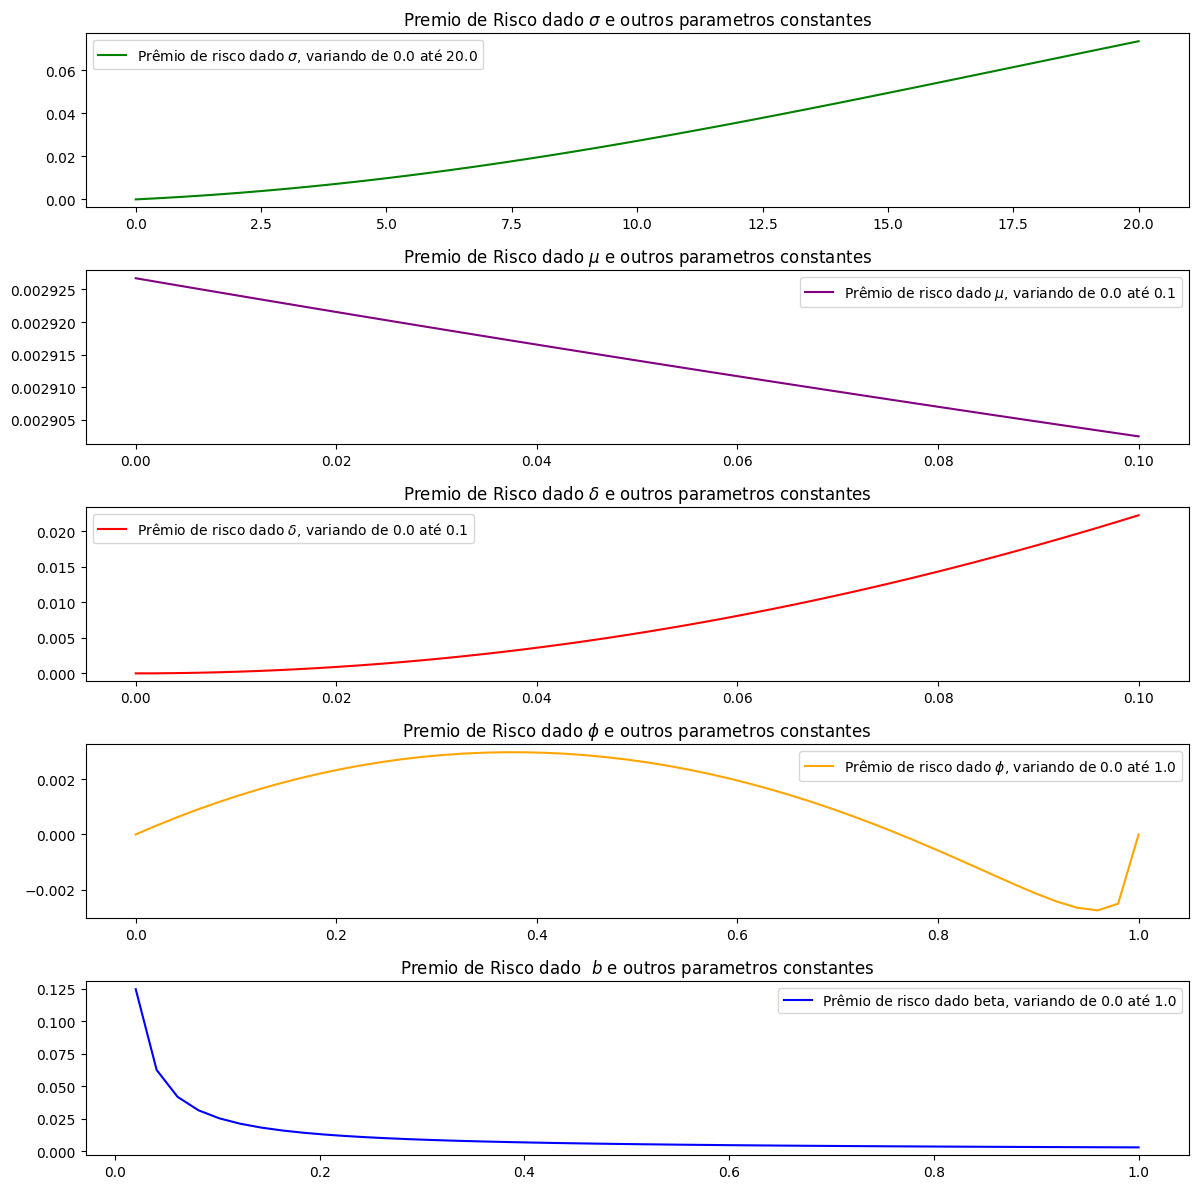

In [66]:
fig, axs = plt.subplots(5, 1, figsize = (12,12))
axs[0].plot(sigma_values, results_sigma,
            label= f'Prêmio de risco dado $\sigma$, variando de {sigma_values.min()} até {sigma_values.max()}', color = 'green')
axs[0].legend() 
axs[0].set_title('Premio de Risco dado $\sigma$ e outros parametros constantes') 

axs[1].plot(mu_values, results_mu, label= f'Prêmio de risco dado $\mu$, variando de {mu_values.min()} até {mu_values.max()}', color = 'purple')
axs[1].legend() 
axs[1].set_title('Premio de Risco dado $\mu$ e outros parametros constantes') 

axs[2].plot(delta_values, results_delta, label= f'Prêmio de risco dado $\delta$, variando de {delta_values.min()} até {delta_values.max()}', color = 'red')
axs[2].legend() 
axs[2].set_title('Premio de Risco dado $\delta$ e outros parametros constantes') 

axs[3].plot(phi_values, results_phi,  label= f'Prêmio de risco dado $\phi$, variando de {phi_values.min()} até {phi_values.max()}', color = 'orange')
axs[3].legend() 
axs[3].set_title('Premio de Risco dado $\phi$ e outros parametros constantes') 


axs[4].plot(beta_values, results_beta, label= f'Prêmio de risco dado beta, variando de {beta_values.min()} até {beta_values.max()}', color = 'blue')
axs[4].legend() 
axs[4].set_title('Premio de Risco dado $\ b$ e outros parametros constantes') 


plt.tight_layout()
plt.show()